In [1]:
import california_housing_data

housing = california_housing_data.load_data()
train_data, test_data = california_housing_data.split_train_test(housing, test_ratio=0.2)

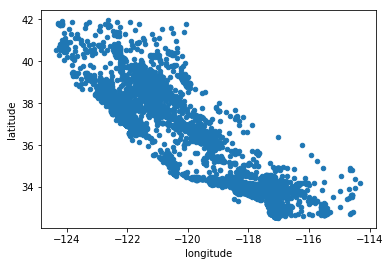

In [3]:
import matplotlib.pyplot as plt

# Step 1

visual_housing = train_data.copy()
visual_housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

# The shape of plot looks like california map.

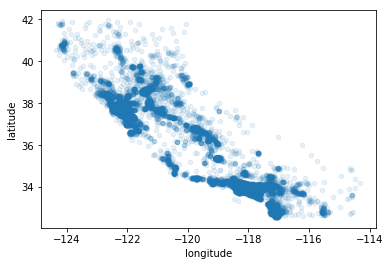

In [4]:
# Step 2: Densely area

visual_housing = train_data.copy()
visual_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

# The plot represents densely populated area.
# The upper cluster is the San Froncisco and lower is the Los Angeles.

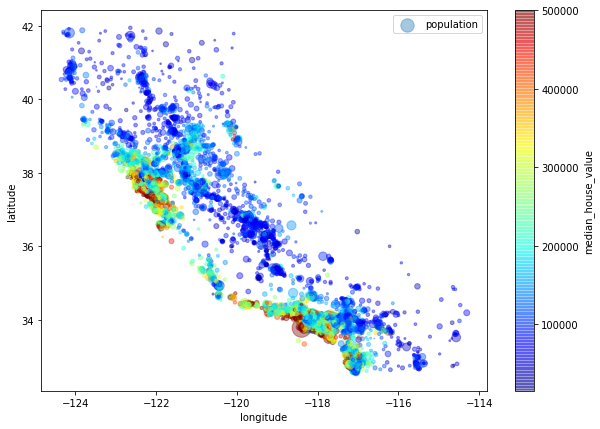

In [5]:
'''
Step 3: Advanced visualization that radius of scatterd samples represents population
and color map represents housing price, red is high and blue is row, jet cmap.
'''

visual_housing.plot(kind='scatter', x='longitude', y='latitude',
                    alpha=0.4,
                    s=housing['population']/100, label='population',
                    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
                    sharex=False,
                    figsize=(10,7))
plt.legend()
plt.show()

In [8]:
'''
Standart correlation coefficients betwen features.

If the coefficient close to zero, it represent independency.
1 is strong positive correlation between features, -1 is strong negative correlation.

Median house value and income are linked with strong positive relationship.
Latitude has strong negative relationship that effects to housing prices tendency
to go down the further north area.
'''
corr_matrix = train_data.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

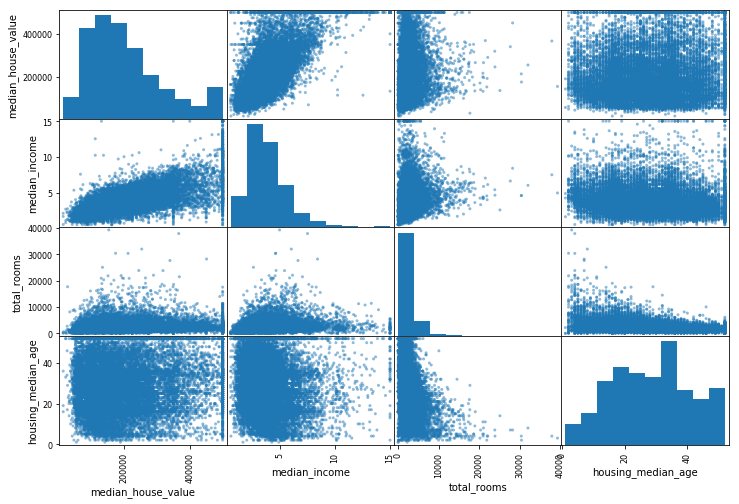

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value',
              'median_income',
              'total_rooms',
              'housing_median_age']
scatter_matrix(visual_housing[attributes],
               figsize=(12,8))
plt.show()

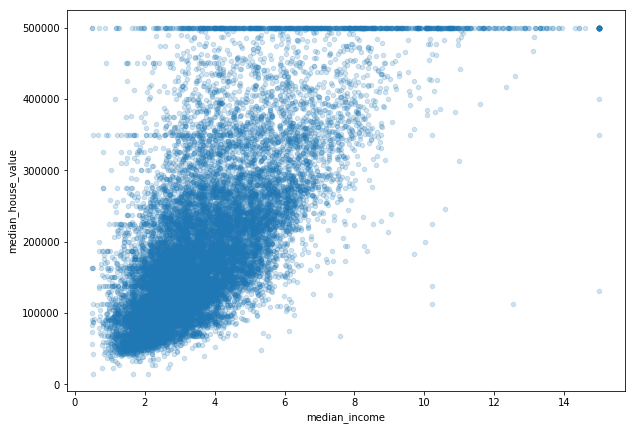

In [18]:
visual_housing.plot(kind='scatter', x='median_income', y='median_house_value',
                    alpha=0.2,
                    figsize=(10,7))
plt.show()

In [22]:
# Combination of features

housing = visual_housing.copy()

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

print('-'*80)
print('Correlation matrix of modified datasets')

mod_corr_matrix = housing.corr()
mod_corr_matrix['median_house_value'].sort_values(ascending=False)

--------------------------------------------------------------------------------
Correlation matrix of modified datasets


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [23]:
print('-'*80)
print('Correlation matrix of original datasets')
corr_matrix['median_house_value'].sort_values(ascending=False)

--------------------------------------------------------------------------------
Correlation matrix of original datasets


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64